In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
help(Normalizer)

Help on class Normalizer in module sklearn.preprocessing._data:

class Normalizer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Normalize samples individually to unit norm.
 |  
 |  Each sample (i.e. each row of the data matrix) with at least one
 |  non zero component is rescaled independently of other samples so
 |  that its norm (l1, l2 or inf) equals one.
 |  
 |  This transformer is able to work both with dense numpy arrays and
 |  scipy.sparse matrix (use CSR format if you want to avoid the burden of
 |  a copy / conversion).
 |  
 |  Scaling inputs to unit norms is a common operation for text
 |  classification or clustering for instance. For instance the dot
 |  product of two l2-normalized TF-IDF vectors is the cosine similarity
 |  of the vectors and is the base similarity metric for the Vector
 |  Space Model commonly used by the Information Retrieval community.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_normalization>`.
 |  
 |  Parameters
 |

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imbalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

In [3]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
X_pos=[]
X_neg=[]
Y_pos=[]
Y_neg=[]
for i in ratios:
    X_p= np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    Y_p=np.array([1]*i[0]).reshape(-1,1)
    Y_n=np.array([0]*i[1]).reshape(-1,1)
    X_pos.append(X_p)
    X_neg.append(X_n)
    Y_pos.append(Y_p)
    Y_neg.append(Y_n)

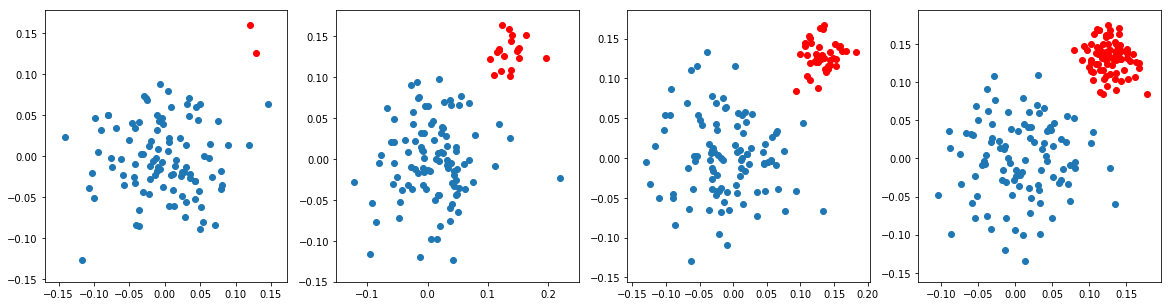

In [4]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j in range(len(X_pos)):
    plt.subplot(1, 4, j+1)
    plt.scatter(X_pos[j][:,0],X_pos[j][:,1])
    plt.scatter(X_neg[j][:,0],X_neg[j][:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

In [5]:
#X is the total x dataset
#y is the total y dataset
#Ratios [(100,2), (100, 20), (100, 40), (100, 80)]
#your task is to apply SVM (sklearn.svm.SVC) and LR (sklearn.linear_model.LogisticRegression) with different regularization strength [0.001, 1, 100]
#Linear SVM

In [6]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])
    #print(points)

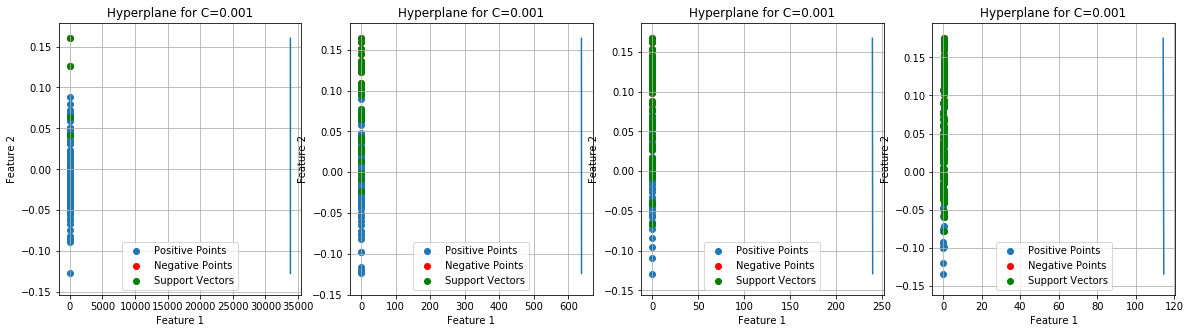

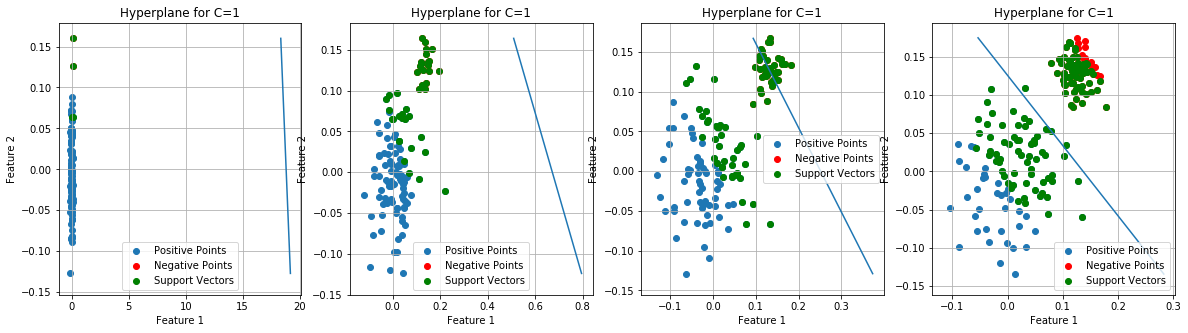

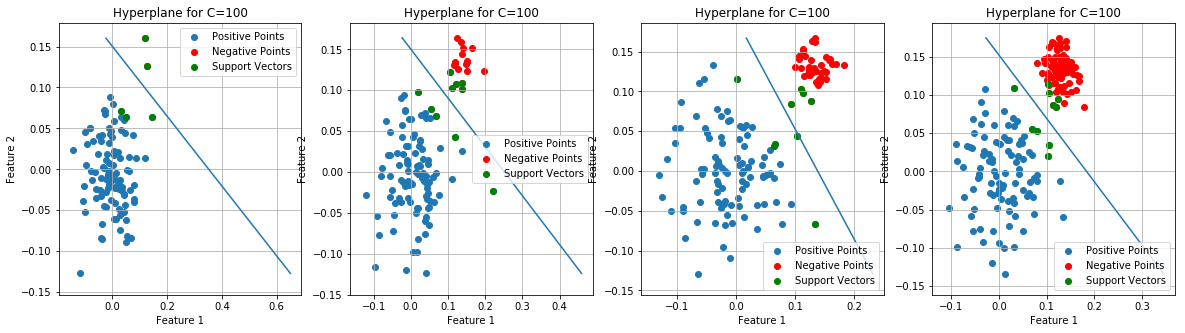

In [7]:
c=[0.001, 1, 100]

for x in c:
    plt.figure(figsize=(20,5))
    #plt.legend()
    for j in range(len(X_pos)): 
        plt.subplot(1, 4, j+1)
        X=np.vstack((X_pos[j],X_neg[j]))
        y=np.vstack((Y_pos[j],Y_neg[j]))
        model=SVC(C=x,kernel='linear',random_state=0)
        model.fit(X,y)
        intercept=(model.intercept_)
        coef=(model.coef_)
        sv=model.support_vectors_
        plt.grid()
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Hyperplane for C={}'.format(x))
        p1=plt.scatter(X_pos[j][:,0],X_pos[j][:,1])
        p2=plt.scatter(X_neg[j][:,0],X_neg[j][:,1],color='red')
        p3=plt.scatter(sv[:,0],sv[:,1],color='green')#Support Vectors
        plt.legend([p1,p2,p3],['Positive Points','Negative Points','Support Vectors'], loc='best')
        draw_line(coef[0],intercept,min(X[:,1]),max(X[:,1]))
    plt.show()

In [8]:
#Could not visualize SVM for other kernels like RBF, Poly etc because coef is only available for Linear Model

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [9]:
#X is the total x dataset
#y is the total y dataset
#Ratios [(100,2), (100, 20), (100, 40), (100, 80)]
#your task is to apply SVM (sklearn.svm.SVC) and LR (sklearn.linear_model.LogisticRegression) with different regularization strength [0.001, 1, 100]
#Logistic Regression
model=LogisticRegression(penalty='l2',C=0.001,random_state=0)
model.fit(X,y)
model.coef_

array([[-0.00535052, -0.00596115]])

In [10]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])
    #print(points)

***************************************Logistic Regression***************************************


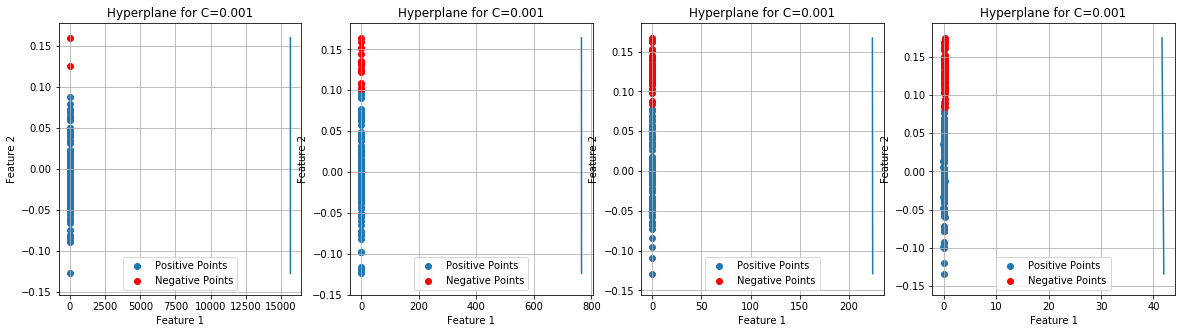

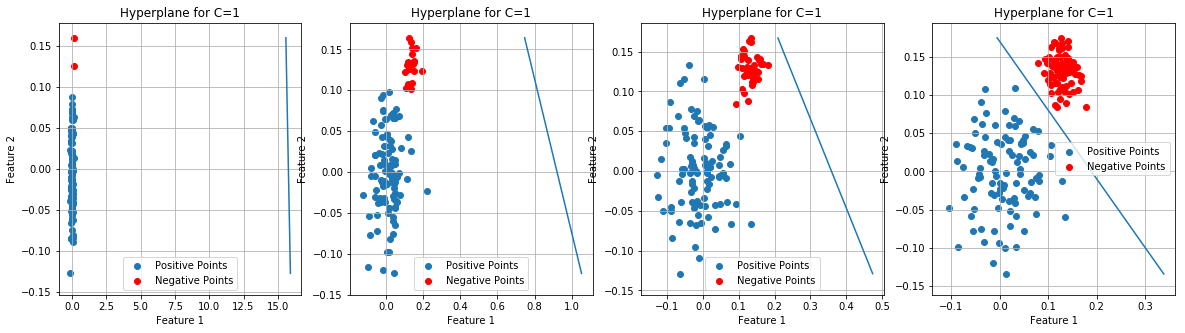

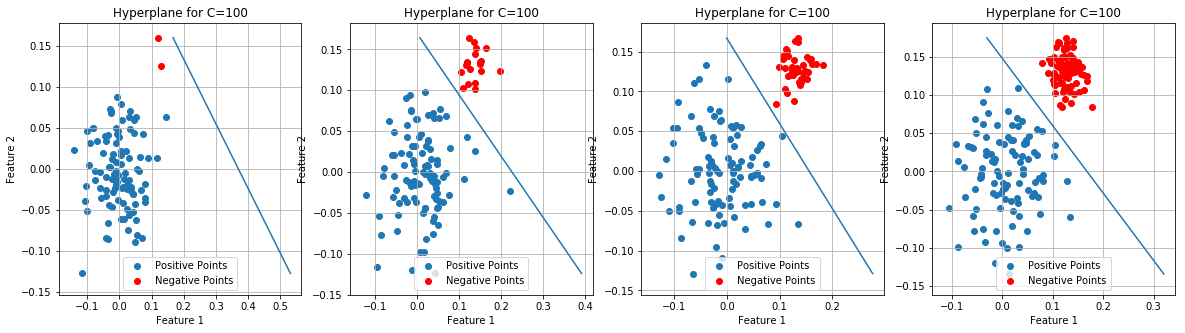

In [11]:
c=[0.001, 1, 100]
lr_coefs=[]
lr_intercept=[]
lr_values=[]
print('***************************************Logistic Regression***************************************')
for x in c:
    plt.figure(figsize=(20,5))
    #plt.legend()
    for j in range(len(X_pos)): 
        plt.subplot(1, 4, j+1)
        X=np.vstack((X_pos[j],X_neg[j]))
        y=np.vstack((Y_pos[j],Y_neg[j]))
        model=LogisticRegression(penalty='l2',C=x,random_state=0)
        model.fit(X,y)
        intercept=(model.intercept_)
        coef=(model.coef_)
        lr_coefs.append(coef)
        lr_intercept.append(intercept)
        lr_values.append((x,i))
        plt.grid()
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Hyperplane for C={}'.format(x))
        p1=plt.scatter(X_pos[j][:,0],X_pos[j][:,1])
        p2=plt.scatter(X_neg[j][:,0],X_neg[j][:,1],color='red')
        plt.legend([p1,p2],['Positive Points','Negative Points'], loc='best')
        draw_line(coef[0],intercept,min(X[:,1]),max(X[:,1]))
    plt.show()

### Have placed both the plots next to each other for better understanding.

***************************************SVC***************************************


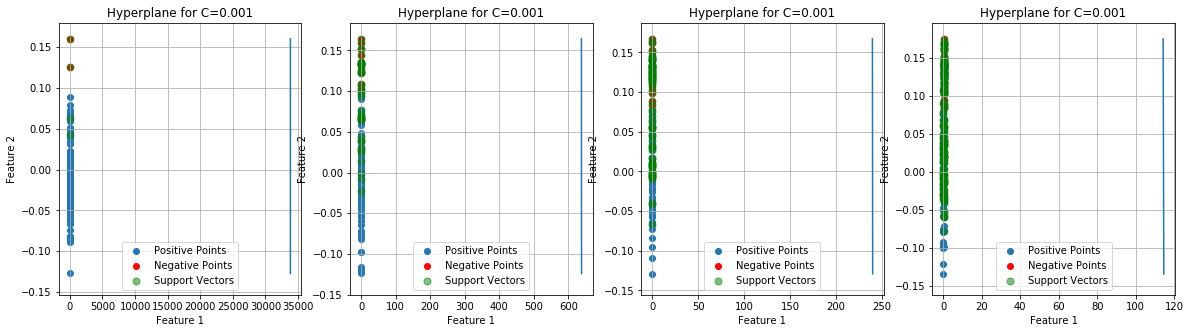

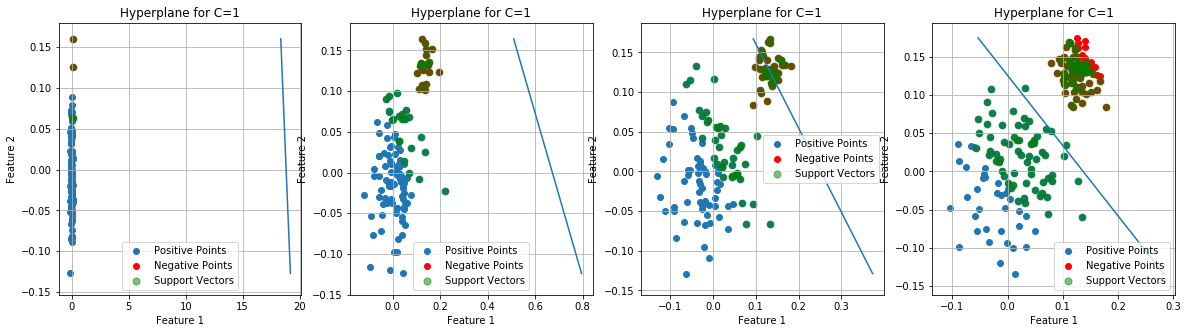

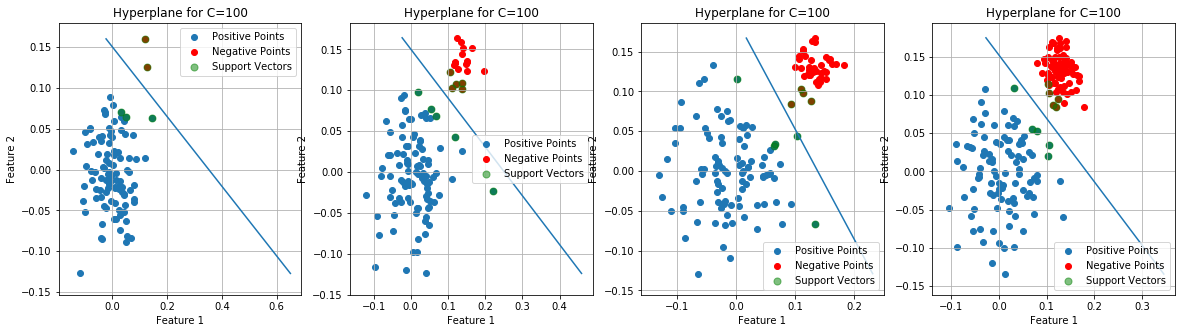

In [12]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c=[0.001, 1, 100]
sv_coefs=[]
sv_intercept=[]
sv_values=[]
print('***************************************SVC***************************************')

for x in c:
    plt.figure(figsize=(20,5))
    #plt.legend()
    for j in range(len(X_pos)): 
        plt.subplot(1, 4, j+1)
        X=np.vstack((X_pos[j],X_neg[j]))
        y=np.vstack((Y_pos[j],Y_neg[j]))
        model=SVC(C=x,kernel='linear',random_state=0)
        model.fit(X,y)
        intercept=(model.intercept_)
        coef=(model.coef_)
        sv_coefs.append(coef)
        sv_intercept.append(intercept)
        sv_values.append((x,i))
        sv=model.support_vectors_
        plt.grid()
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Hyperplane for C={}'.format(x))
        p1=plt.scatter(X_pos[j][:,0],X_pos[j][:,1])
        p2=plt.scatter(X_neg[j][:,0],X_neg[j][:,1],color='red')
        p3=plt.scatter(sv[:,0],sv[:,1],color='green',s=50,alpha=0.5)#Support Vectors
        plt.legend([p1,p2,p3],['Positive Points','Negative Points','Support Vectors'], loc='best')
        draw_line(coef[0],intercept,min(X[:,1]),max(X[:,1]))
    plt.show()

In [13]:
lr_coefs
lr_intercept
lr_values
sv_coefs
sv_intercept
sv_values

[(0.001, (100, 80)),
 (0.001, (100, 80)),
 (0.001, (100, 80)),
 (0.001, (100, 80)),
 (1, (100, 80)),
 (1, (100, 80)),
 (1, (100, 80)),
 (1, (100, 80)),
 (100, (100, 80)),
 (100, (100, 80)),
 (100, (100, 80)),
 (100, (100, 80))]

In [14]:
from prettytable import PrettyTable
t=PrettyTable()
print('Logistic Regression')
t.add_column('C Values',[i[0] for i in lr_values])
t.add_column('Data Ratio',[i[1] for i in lr_values])
t.add_column('Coef Values',lr_coefs)
t.add_column('Coef Values',lr_intercept)
print(t)

Logistic Regression
+----------+------------+-------------------------------+--------------+
| C Values | Data Ratio |          Coef Values          | Coef Values  |
+----------+------------+-------------------------------+--------------+
|  0.001   | (100, 80)  |  [[-0.00024981 -0.00028723]]  | [3.91202198] |
|  0.001   | (100, 80)  |  [[-0.00210107 -0.00222251]]  | [1.60954312] |
|  0.001   | (100, 80)  |  [[-0.00409316 -0.00363624]]  | [0.91654878] |
|  0.001   | (100, 80)  |  [[-0.00535052 -0.00596115]]  | [0.22381407] |
|    1     | (100, 80)  |  [[-0.24812983 -0.28575581]]  | [3.91205398] |
|    1     | (100, 80)  |  [[-1.87127703 -1.98831997]]  | [1.72309719] |
|    1     | (100, 80)  |  [[-3.22073574 -2.87481775]]  | [1.15514028] |
|    1     | (100, 80)  |  [[-3.80636096 -4.22762602]]  | [0.71876854] |
|   100    | (100, 80)  | [[-12.50879477 -15.90359396]] | [4.63321626] |
|   100    | (100, 80)  | [[-20.95465019 -27.97859166]] | [4.72395516] |
|   100    | (100, 80)  | [[-27

In [15]:
t2=PrettyTable()
print('SVM')
t2.add_column('C Values',[i[0] for i in sv_values])
t2.add_column('Data Ratio',[i[1] for i in sv_values])
t2.add_column('Coef Values',sv_coefs)
t2.add_column('Coef Values',sv_intercept)
print(t2)

SVM
+----------+------------+-------------------------------------+--------------+
| C Values | Data Ratio |             Coef Values             | Coef Values  |
+----------+------------+-------------------------------------+--------------+
|  0.001   | (100, 80)  | [[-2.95688171e-05 -1.80214111e-04]] | [1.00001278] |
|  0.001   | (100, 80)  |     [[-0.00156707 -0.00169607]]     | [1.00010282] |
|  0.001   | (100, 80)  |     [[-0.00416529 -0.00403805]]     | [1.00010996] |
|  0.001   | (100, 80)  |     [[-0.00872514 -0.00952373]]     | [0.99953998] |
|    1     | (100, 80)  |     [[-0.05388536 -0.1585148 ]]     | [1.01324945] |
|    1     | (100, 80)  |     [[-1.6351109  -1.62360927]]     | [1.10003565] |
|    1     | (100, 80)  |     [[-4.20504917 -3.9566584 ]]     | [1.05693421] |
|    1     | (100, 80)  |     [[-6.23731238 -6.78987321]]     | [0.85420524] |
|   100    | (100, 80)  |    [[ -6.55874278 -15.35152514]]    | [2.3130542]  |
|   100    | (100, 80)  |    [[-14.40404673 -24.

### Visual Observations:
- SVM is less affected with imbalanced datasets as compared to Logistic Regression. Because we can see that for the same dataset with the ratio (100, 40) and (100, 80) the hyperplane has reached a better place as compared to the Logistic Regression.
- SVM is learning and improving faster than Logistic Regression.
- With a low C both the algorithms will not work at all.
- SVM is better than LR as it is not affected by all the points but only a set of support vectors.
- Because the regularisation term is (+C|W|), a small value of C actually affects the hyperplane.

#### How is the loss function affected by different values of the regularization parameter?
* #### For Logistic Regression
- When the C value is very less like 0.001, the plane is very far from the actual datapoints for all ratios of datasets which can actually be seen clearly in the plot and also in the values. 
- But as the value increases to 1, the model starts to find comparatively better planes for all ratios of Dataset. Additionally a high C value is not affected by imbalanced Dataset and is working comparatively better.
- Because the Regularisation term is added, having a high C value actually increases the weights of the hyperplane more than it would be with only the "Logistic Regression Equation". Hence making the model more robust to Imbalanced Datasets. It is working like momentum in Deep Learning.
- From a high level view, the C balances between the overfitting and underfitting by increasing and decreasing the value of weights.

* #### For SVM
- As mentioned in the Observation, at C=0.001, the plane is not even close to the Dataset for all the ratio of Dataset similar to LR.
- But the major difference here, is that because SVM is trying to reduce the margin and is not affected by all the points but only support vectors, the plane is not much affected by imbalanced Dataset, provided when we select the right C.
- The Support Vectors are red in color and for 100, they seem to be exactly fit to the model.
______________________________________________________________________________________________________________________
#### In both the Models, the C value works the same way, that is to balance off between overfitting and underfitting.
_______________________________________________________________________________________________________________________


#### How the final plane or line that we get is affected by different values of regularization parameter and different count of outliers (if any).
- #### For Logistic Regression
- At a low C , for all types of data the "Logistic Regression Equation" alone gives a very small value for "W & b" hence is not able to find the best hyperplane.
- Which clearly shows that Logistic Regression Equation is not alone enough to solve/separate any datasets.
- But at a optimal or a higher C, the value of the "Regularization Term( C|W|)" increases and hence the "W & b" value increases due to which the hyperplanes are better with right regularization.

- #### For SVM:
- At a low C, the SVM is not working and will not perform well, because the plane is actually too far from the actual data.
- Similar to LR, the SVM equation alone gives very small values, hence cannot find the best planes.
- SVM is more robust to imbalanced Data as compared to LR.
- Because for the same Imbalanced Dataset, the planes are very far from the Dataset for LR as compared to SVM.

#### Whether the model is overfitting or underfitting or is optimal at a particular value of regularization parameter.
- #### For Logistic Regression
- For all the Ratios 0.001 is underfitting
- Ratio (100,2): C=100 is the right C value for this Dataset
- Ratio (100, 20): C=100
- Ratio (100, 40): C=100
- Ratio (100, 80): C=1

- #### For SVM:
- Again for all the ratios 0.001 is underfitting.
- Ratio (100,2): C=100
- Ratio (100, 20): C=100
- Ratio (100, 40): C=100
- Ratio (100, 80): C=1